In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset =pd.read_csv('C:\\Users\\ashish\\Desktop\\deep\\data\\Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X =dataset.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y= dataset.iloc[:,13]

In [8]:
#creating one-hot-encoding for Geography and Gender

In [9]:
geography= pd.get_dummies(X['Geography'],drop_first=True)
gender =  pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
X =pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
#dropping the categorical Geography and Gender

In [13]:
X=X.drop(['Geography','Gender'],axis=1)


In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
#Feature_scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test =scalar.fit_transform(X_test)

In [ ]:
#######################################################################################################################

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [20]:
#Initialising ANN
classifier =Sequential()

In [ ]:
#Adding the input layer and first hidden layer

In [24]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
#classifier.add(Dropout(0.3))  if needed.
#it can be also written as 
# classifier.add(Dense(output_dim=6,init='he_uniform',activation='relu',input_dim=11))

In [25]:
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
#classifier.add(Dropout(0.3)) if needed

In [27]:
#Adding output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [34]:
#compiling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
#fitting the ANN to the training set
model_history =classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

W0311 20:15:05.536657  9132 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 555us/step - loss: 0.5976 - accuracy: 0.7378 - val_loss: 0.4926 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 205us/step - loss: 0.4765 - accuracy: 0.7962 - val_loss: 0.4691 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.4537 - accuracy: 0.7962 - val_loss: 0.4542 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 215us/step - loss: 0.4429 - accuracy: 0.7962 - val_loss: 0.4500 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 216us/step - loss: 0.4364 - accuracy: 0.7962 - val_loss: 0.4471 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 209us/step - loss: 0.4317 - accuracy: 0.7962 - val_loss: 0.4447 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 206us/step

In [ ]:
#######################################################################################################################

In [44]:
#predicting the test result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [67]:
#confusion matrix,accuracy,classification report
from sklearn.metrics import confusion_matrix,accuracy_score
cm =confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_pred,y_test)

In [68]:
print(cm)

print(accuracy)

[[1496   99]
 [ 198  207]]
0.8515


In [ ]:
######################################################################################################################

In [ ]:
#visualization

In [51]:
#list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


<function matplotlib.pyplot.show(*args, **kw)>

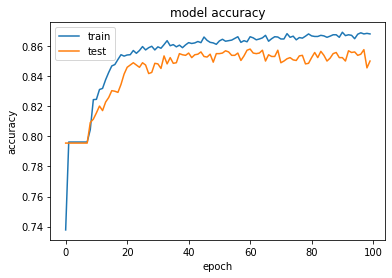

In [64]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show